   # Social Media Usagee : A TikTok Case Study

Zohra Bouchamaoui 

## Import the required packages

In [152]:
# Import packages

import re
import ast
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
import statsmodels.api as sm
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from wordcloud import WordCloud, STOPWORDS

from sklearn.decomposition import PCA, NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en
import spacy

%pip install gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/princessspotty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


You are using pip version 19.0.3, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/en_core_web_sm
-->
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')
You are using pip version 19.0.3, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Import the dataset 

In our analysis, we will mainly be using the TikTok Trending posts. Additionally, we will load information about the hashtags used for each post, the number of followers and videos of each user and the country from where the posts have been made. 

In [153]:
# Load the CSV file into a Pandas dataframe
tiktok = pd.read_csv('/Users/princessspotty/Desktop/tiktokdata_missingmusichashtag.csv')

# We display the number of rows and columns in the tiktok dataframe
print('The tiktok dataframe has {} rows and {} columns'.format(tiktok.shape[0], tiktok.shape[1]))
tiktok.head()

The tiktok dataframe has 2081 rows and 39 columns


,id,text,createTime,authorMeta.id,authorMeta.secUid,authorMeta.verified,authorMeta.signature,authorMeta.avatar,musicMeta.musicId,musicMeta.musicName,...,downloaded,mentions,hashtags,follower_count,following_count,video_count,verification_type,total_favorited,country,hashtag_data
0,6891159927197420801,#dúo con @reallife556 #foryoupage #foryou #xyz...,1604473205,6527232399644824591,MS4wLjABAAAArJYA92CYZIUmnMinfPTM8TF-pN0JxH7zaI...,False,El que quiere algo real\nQue sea leal❤️\n😘😘😘,https://p77-sign-sg.tiktokcdn.com/musically-ma...,678199150801165,Iris,...,False,"[""@reallife556""]","[{""id"":""82813861"",""name"":""dúo"",""title"":"""",""cov...",694999.0,8020.0,388.0,NaN,4493552.0,ES,"[{""name"": ""d\u00fao""}, {""posts"": 597485002, ""n..."
1,6906146877503180034,#duo #excelochallenge2 #fyp #wled_bandoura wa...,1607962624,6647857246888230918,MS4wLjABAAAAy3Z4ogrvf4e9KwfFz7CqT0sD7i9N1LLKgi...,False,Kick-boxig❤️❤️👊🏻💪🏻\n18 sna💋\nBnt bandoura❤️💋\n...,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,69009607171479E,origineel geluid,...,False,"[""@elfidharayen3""]","[{""id"":""40631"",""name"":""duo"",""title"":""Use our D...",60268.0,651.0,103.0,NaN,434597.0,TN,"[{""posts"": 33427582, ""name"": ""duo"", ""views"": 5..."
2,6896871301944773889,#реклама #tunis #لفليحشيش #حشيش #тунис,1605802986,183025524246499328,MS4wLjABAAAAmMHS9hLz1V61ZwS2Sjcg6QoOOxiL1TR4cF...,False,💎💎Tunisia 🇹🇳💎💎 Russia 🇷🇺💎💎,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6.86937383362783E+18,original sound,...,False,[],"[{""id"":""5789455"",""name"":""реклама"",""title"":"""",""...",247273.0,273.0,38.0,NaN,523007.0,TN,"[{""name"": ""\u0440\u0435\u043a\u043b\u0430\u043..."
3,6906506771032984833,#alquran_alkareem0,1608046419,6903541454015808513,MS4wLjABAAAAEhrGQFHMRX9ILKsYXj1xMUikxohMfDCkJt...,False,جهى مه: ل زاخو بيدارى ده ڤ مول زيرڤا \nالعنوان...,https://p77-sign-sg.tiktokcdn.com/aweme/1080x1...,6.84126004428651E+18,original sound,...,False,[],"[{""id"":""1666984617018373"",""name"":""alquran_alka...",75540.0,3.0,58.0,NaN,864295.0,IQ,"[{""posts"": 840, ""name"": ""alquran_alkareem0"", ""..."
4,6898962539388947713,استعنا عالشقاء بالله والحمد الله ❤❤❤❤❤,1606289891,6618171640613437446,MS4wLjABAAAAKZ6x00c1XiQAkcQaoJNEbOPckYsrSqY6JI...,False,اخواني اخواتي هاذا حسابي الوحيد ليا واي حساب...,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6.89465123361375E+18,orijinal ses,...,False,[],[],338902.0,26.0,1163.0,NaN,3555507.0,TN,[{}]


###### RapidAPI (2020). 'TikTok'. [online]. Available at: <https://rapidapi.com/logicbuilder/api/tiktok/endpoints> [Accessed on 16 December 2020] 

###### Nord, A. (2020). 'TikTok Scraper'.[online]. Available at: <https://github.com/drawrowfly/tiktok-scraper>  [Accessed on 16 December 2020] 

In [154]:
# We look at the summary statistics of the dataset
statistics = tiktok.describe()
print(statistics)

                 id    createTime  authorMeta.id  videoUrlNoWaterMark  \
count  2.081000e+03  2.081000e+03   2.081000e+03                  0.0   
mean   6.890983e+18  1.604432e+09   5.635427e+18                  NaN   
std    1.038687e+16  2.418379e+06   2.461411e+18                  NaN   
min    6.867117e+18  1.598875e+09   4.076718e+06                  NaN   
25%    6.883179e+18  1.602615e+09   6.601819e+18                  NaN   
50%    6.892093e+18  1.604691e+09   6.717651e+18                  NaN   
75%    6.899502e+18  1.606416e+09   6.804784e+18                  NaN   
max    6.906905e+18  1.608139e+09   6.905910e+18                  NaN   

       videoMeta.height  videoMeta.width  videoMeta.duration     diggCount  \
count       2081.000000      2081.000000         2081.000000  2.081000e+03   
mean         965.869294       570.944738           19.728015  3.752049e+05   
std          127.153958        73.531582           13.259323  1.211856e+06   
min          144.000000       

## Pre-processing 

First, we start by dropping the unecessary columns. Then, we converted the timestamp to dateTime and looked for empty values. Because of the nature of our data, we will choose to drop the empty rows instead of filling them with '0' or the mean value of the column.

In [155]:
# We drop the unecessary columns (and the name of users for ethical reasons)

tiktok = tiktok.drop(columns= ['authorMeta.id', 'authorMeta.signature', 'authorMeta.avatar', 'musicMeta.playUrl', 'musicMeta.coverThumb', 'authorMeta.secUid', 'musicMeta.coverMedium', 'musicMeta.coverLarge', 'covers.default', 'covers.origin', 'covers.dynamic', 'webVideoUrl', 'videoUrl', 'videoUrlNoWaterMark', 'videoMeta.height', 'videoMeta.width', 'mentions', 'verification_type', 'musicMeta.musicId', 'musicMeta.musicName',  'musicMeta.musicAuthor', 'musicMeta.musicOriginal' ])
tiktok = tiktok.rename(columns={'authorMeta.verified':'verified_user', 'videoMeta.duration':'video_duration', 'diggCount':'likesCount'})
tiktok.head()

,id,text,createTime,verified_user,video_duration,likesCount,shareCount,playCount,commentCount,downloaded,hashtags,follower_count,following_count,video_count,total_favorited,country,hashtag_data
0,6891159927197420801,#dúo con @reallife556 #foryoupage #foryou #xyz...,1604473205,False,22,45400,18100,1300000,198,False,"[{""id"":""82813861"",""name"":""dúo"",""title"":"""",""cov...",694999.0,8020.0,388.0,4493552.0,ES,"[{""name"": ""d\u00fao""}, {""posts"": 597485002, ""n..."
1,6906146877503180034,#duo #excelochallenge2 #fyp #wled_bandoura wa...,1607962624,False,10,3899,98,109200,45,False,"[{""id"":""40631"",""name"":""duo"",""title"":""Use our D...",60268.0,651.0,103.0,434597.0,TN,"[{""posts"": 33427582, ""name"": ""duo"", ""views"": 5..."
2,6896871301944773889,#реклама #tunis #لفليحشيش #حشيش #тунис,1605802986,False,15,212900,4650,2900000,1750,False,"[{""id"":""5789455"",""name"":""реклама"",""title"":"""",""...",247273.0,273.0,38.0,523007.0,TN,"[{""name"": ""\u0440\u0435\u043a\u043b\u0430\u043..."
3,6906506771032984833,#alquran_alkareem0,1608046419,False,14,209700,1906,2000000,1709,False,"[{""id"":""1666984617018373"",""name"":""alquran_alka...",75540.0,3.0,58.0,864295.0,IQ,"[{""posts"": 840, ""name"": ""alquran_alkareem0"", ""..."
4,6898962539388947713,استعنا عالشقاء بالله والحمد الله ❤❤❤❤❤,1606289891,False,9,11900,57,290800,324,False,[],338902.0,26.0,1163.0,3555507.0,TN,[{}]


In [156]:
# Convert timestamp (createTime) to DateTime and replace the original column with the results
tiktok.createTime = pd.to_datetime(tiktok.createTime, unit ='s')
tiktok.createTime

0      2020-11-04 07:00:05
1      2020-12-14 16:17:04
2      2020-11-19 16:23:06
3      2020-12-15 15:33:39
4      2020-11-25 07:38:11
               ...        
2076   2020-10-06 10:01:43
2077   2020-11-25 21:48:25
2078   2020-10-06 20:18:45
2079   2020-09-19 22:56:03
2080   2020-11-14 16:14:58
Name: createTime, Length: 2081, dtype: datetime64[ns]

In [157]:
# We look for the empty values 
null_cols = tiktok.columns[tiktok.isnull().any()]
tiktok[null_cols].isnull().sum()

text               209
follower_count      23
following_count     23
video_count         23
total_favorited     23
country             23
hashtag_data       455
dtype: int64

Text(0.5,1,'Imputed with the mean')

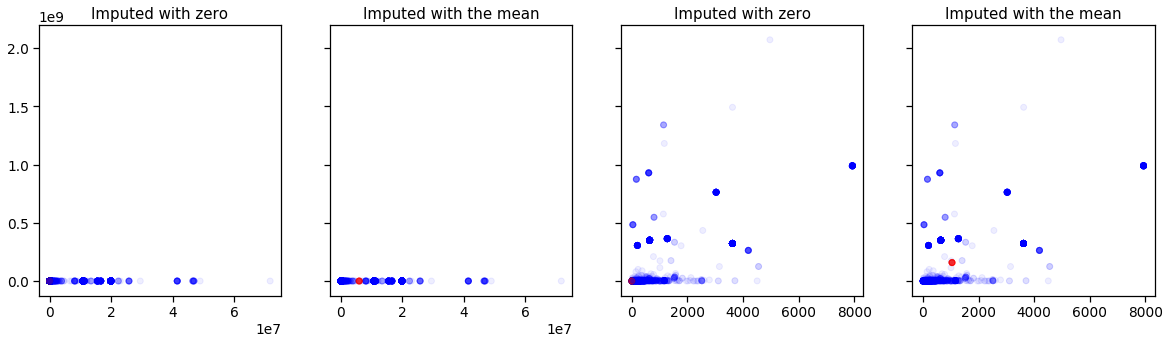

In [158]:
#  We try and replace the missing values, first by using '0' and then by using the mean of each variable
# Replacing using zero
follower_count_zero = tiktok['follower_count'].fillna(0)
following_count_zero = tiktok['following_count'].fillna(0)
video_count_zero = tiktok['video_count'].fillna(0)
total_favorited_count_zero = tiktok['total_favorited'].fillna(0)

# Replacing using mean
follower_count_mean = tiktok['follower_count'].fillna(statistics['follower_count']['mean'])
following_count_mean = tiktok['following_count'].fillna(statistics['following_count']['mean'])
video_count_mean = tiktok['video_count'].fillna(statistics['video_count']['mean'])
total_favorited_count_mean = tiktok['total_favorited'].fillna(statistics['total_favorited']['mean'])

# This optional step will identify rows where at least one of the values is NaN with True
atLeastOneNaN = tiktok['follower_count'].isnull() | tiktok['following_count'].isnull()| tiktok['video_count'].isnull()| tiktok['total_favorited'].isnull()

# We specify the colors of the dots on the plots using a color palette and adding it to the new column
colourPalette = {True: '#ff000011', False: '#0000ff11'}
colours = atLeastOneNaN.map(colourPalette)

# We are going to plot the values replaced using scatter plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize = (20,5))
# Plot of the zero-imputed values
ax1.scatter(follower_count_zero, following_count_zero, c=colours)
ax1.set_title('Imputed with zero')
# Plot of the mean-imputed values
ax2.scatter(follower_count_mean, following_count_mean, c=colours)
ax2.set_title('Imputed with the mean')

# Plot of the zero-imputed values
ax3.scatter(video_count_zero, total_favorited_count_zero, c=colours)
ax3.set_title('Imputed with zero')
# Plot of the mean-imputed values
ax4.scatter(video_count_mean, total_favorited_count_mean, c=colours)
ax4.set_title('Imputed with the mean')

In [159]:
# And we drop the empty rows as we have enough data to do this
tiktok = tiktok.dropna()
tiktok[null_cols].isnull().sum()

text               0
follower_count     0
following_count    0
video_count        0
total_favorited    0
country            0
hashtag_data       0
dtype: int64

In [160]:
# We display the number of rows and columns in the tiktok dataframe
print('The tiktok dataframe has {} rows and {} columns'.format(tiktok.shape[0], tiktok.shape[1]))

The tiktok dataframe has 1419 rows and 17 columns


###### City, University of London (2020). 'Lab 2 Feedback'. In3061 Principles of data science
###### City, University of London (2020). 'Lab 3 Feedback'. In3061 Principles of data science

## Feature Engineering

In order to make this a more interesting project, we created new features derived from the ones already available in our data.

Likes to views ratio = number of likes / number of views 

###### Represents the percentage of people who engaged with the video by liking it amongst all the people who watched it.

Comments to views ratio = number of comments / number of views :

###### Represents the percentage of people who engaged with the video by commenting on it amongst all the people who watched it.

Views to followers ratio = number of views / number of followers

###### Represents the percentage of views on a video compared to the number of followers a user has.

In [161]:
# We create columns with new ratios 
# Like to view ratio
tiktok['like_to_view_ratio'] = tiktok['likesCount']/tiktok['playCount']

# Comment to view ratio
tiktok['comment_to_view_ratio'] = tiktok['commentCount']/tiktok['playCount']

# View to follower ratio
tiktok['view_to_follower_ratio'] = tiktok['playCount']/tiktok['follower_count']

tiktok

,id,text,createTime,verified_user,video_duration,likesCount,shareCount,playCount,commentCount,downloaded,hashtags,follower_count,following_count,video_count,total_favorited,country,hashtag_data,like_to_view_ratio,comment_to_view_ratio,view_to_follower_ratio
0,6891159927197420801,#dúo con @reallife556 #foryoupage #foryou #xyz...,2020-11-04 07:00:05,False,22,45400,18100,1300000,198,False,"[{""id"":""82813861"",""name"":""dúo"",""title"":"""",""cov...",694999.0,8020.0,388.0,4493552.0,ES,"[{""name"": ""d\u00fao""}, {""posts"": 597485002, ""n...",0.034923,0.000152,1.870506
1,6906146877503180034,#duo #excelochallenge2 #fyp #wled_bandoura wa...,2020-12-14 16:17:04,False,10,3899,98,109200,45,False,"[{""id"":""40631"",""name"":""duo"",""title"":""Use our D...",60268.0,651.0,103.0,434597.0,TN,"[{""posts"": 33427582, ""name"": ""duo"", ""views"": 5...",0.035705,0.000412,1.811907
2,6896871301944773889,#реклама #tunis #لفليحشيش #حشيش #тунис,2020-11-19 16:23:06,False,15,212900,4650,2900000,1750,False,"[{""id"":""5789455"",""name"":""реклама"",""title"":"""",""...",247273.0,273.0,38.0,523007.0,TN,"[{""name"": ""\u0440\u0435\u043a\u043b\u0430\u043...",0.073414,0.000603,11.727928
3,6906506771032984833,#alquran_alkareem0,2020-12-15 15:33:39,False,14,209700,1906,2000000,1709,False,"[{""id"":""1666984617018373"",""name"":""alquran_alka...",75540.0,3.0,58.0,864295.0,IQ,"[{""posts"": 840, ""name"": ""alquran_alkareem0"", ""...",0.104850,0.000855,26.476039
4,6898962539388947713,استعنا عالشقاء بالله والحمد الله ❤❤❤❤❤,2020-11-25 07:38:11,False,9,11900,57,290800,324,False,[],338902.0,26.0,1163.0,3555507.0,TN,[{}],0.040922,0.001114,0.858065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,6877476639752637697,Omg 😳 #foryoupage #foryou,2020-09-28 10:01:55,False,12,90800,330,879000,209,False,"[{""id"":""88764338"",""name"":""foryoupage"",""title"":...",15563394.0,0.0,1273.0,363787639.0,NL,"[{""posts"": 597627326, ""name"": ""foryoupage"", ""v...",0.103299,0.000238,0.056479
1622,6897561607711280385,Can you do this dance 💃 #foryoupage #foryou vi...,2020-11-21 13:01:50,False,20,148100,2187,1500000,446,False,"[{""id"":""88764338"",""name"":""foryoupage"",""title"":...",15563394.0,0.0,1273.0,363787639.0,NL,"[{""posts"": 597627326, ""name"": ""foryoupage"", ""v...",0.098733,0.000297,0.096380
1623,6891098414122028290,La mejor fiesta en los Kids Choice Awards 2020...,2020-11-04 03:01:22,True,8,1200000,2573,7400000,4371,False,"[{""id"":""1659267957306373"",""name"":""kcamexico202...",16638210.0,177.0,3031.0,762699217.0,MX,"[{""posts"": 582, ""name"": ""kcamexico2020"", ""view...",0.162162,0.000591,0.444759
1624,6880121019957251329,What’s the name of this movie 🎥 #foryoupage #f...,2020-10-05 13:03:27,False,40,494200,2940,9500000,2991,False,"[{""id"":""88764338"",""name"":""foryoupage"",""title"":...",15563394.0,0.0,1273.0,363787639.0,NL,"[{""posts"": 597627326, ""name"": ""foryoupage"", ""v...",0.052021,0.000315,0.610407


### Visualisation of the new ratios

In this section, we first aim to know if a user is likely to leave comment on whether they like/or were entertained by the video.

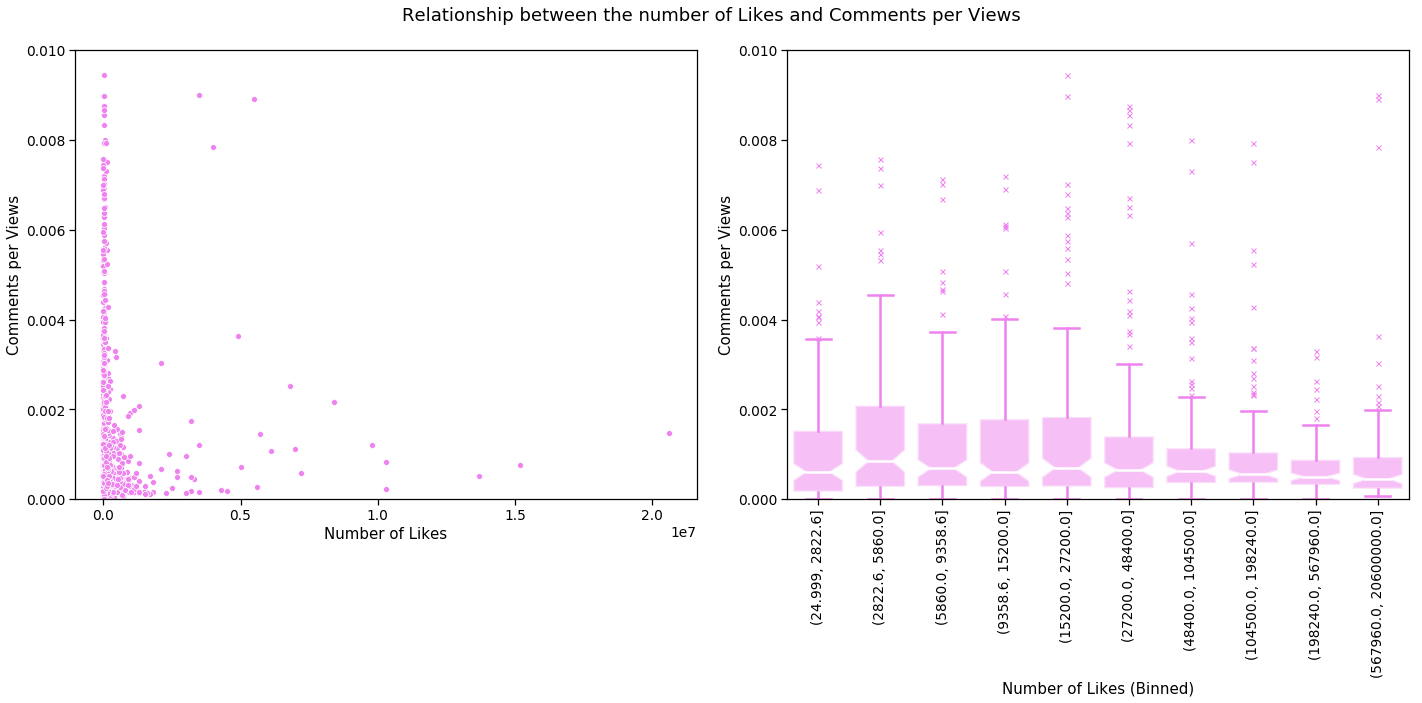

In [162]:
# Scatterplot
plt.figure(figsize=(20, 10), linewidth=1)
plt.subplot(1,2,1)
sns.scatterplot(x=tiktok['likesCount'], y=tiktok['comment_to_view_ratio'], color = "violet")
plt.xlabel('Number of Likes')
plt.ylabel('Comments per Views')
plt.ylim(0, 0.01)

# We create boxplot that are separated by equally dense groups
plt.subplot(1,2,2)
sns.boxplot(x=pd.qcut(tiktok['likesCount'], 10), y=tiktok['comment_to_view_ratio'], notch=True, 
            boxprops={'alpha':.5, 'edgecolor':'white', 'facecolor':'violet'},
            whiskerprops={'color':'violet'},
            medianprops={'color':'white'},
            flierprops={'marker':'x', 'markerfacecolor':'white', 'markeredgecolor':'violet'},
            capprops={'color':'violet'}) 

plt.ylim(0, 0.01)
plt.xticks(rotation=90)
plt.xlabel('Number of Likes (Binned)')
plt.ylabel('Comments per Views')
plt.suptitle('Relationship between the number of Likes and Comments per Views')
plt.tight_layout(rect=[0,0,1,.95]);

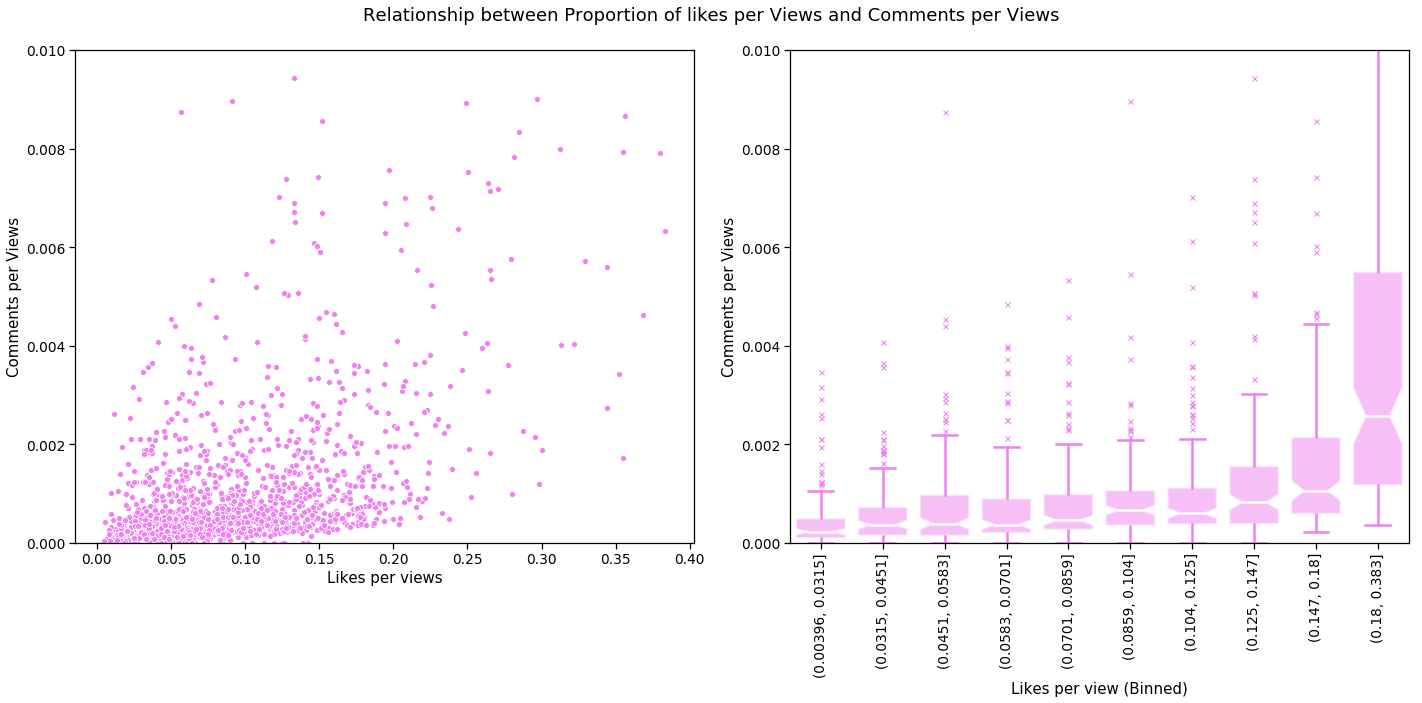

In [163]:
# Scatterplot
plt.figure(figsize=(20, 10), linewidth=1)
plt.subplot(1,2,1)
sns.scatterplot(x=tiktok['like_to_view_ratio'], y=tiktok['comment_to_view_ratio'], color = 'violet')
plt.xlabel('Likes per views')
plt.ylabel('Comments per Views')
plt.ylim(0, 0.01)

# We create boxplot that are separated by equally dense groups
plt.subplot(1,2,2)
sns.boxplot(x=pd.qcut(tiktok['like_to_view_ratio'], 10), y=tiktok['comment_to_view_ratio'], notch=True, 
            boxprops={'alpha':.5, 'edgecolor':'white', 'facecolor':'violet'},
            whiskerprops={'color':'violet'},
            medianprops={'color':'white'},
            flierprops={'marker':'x', 'markerfacecolor':'white', 'markeredgecolor':'violet'},
            capprops={'color':'violet'}) 

plt.ylim(0, 0.01)
plt.xticks(rotation=90)
plt.xlabel('Likes per view (Binned)')
plt.ylabel('Comments per Views')
plt.suptitle('Relationship between Proportion of likes per Views and Comments per Views')
plt.tight_layout(rect=[0,0,1,.95]);

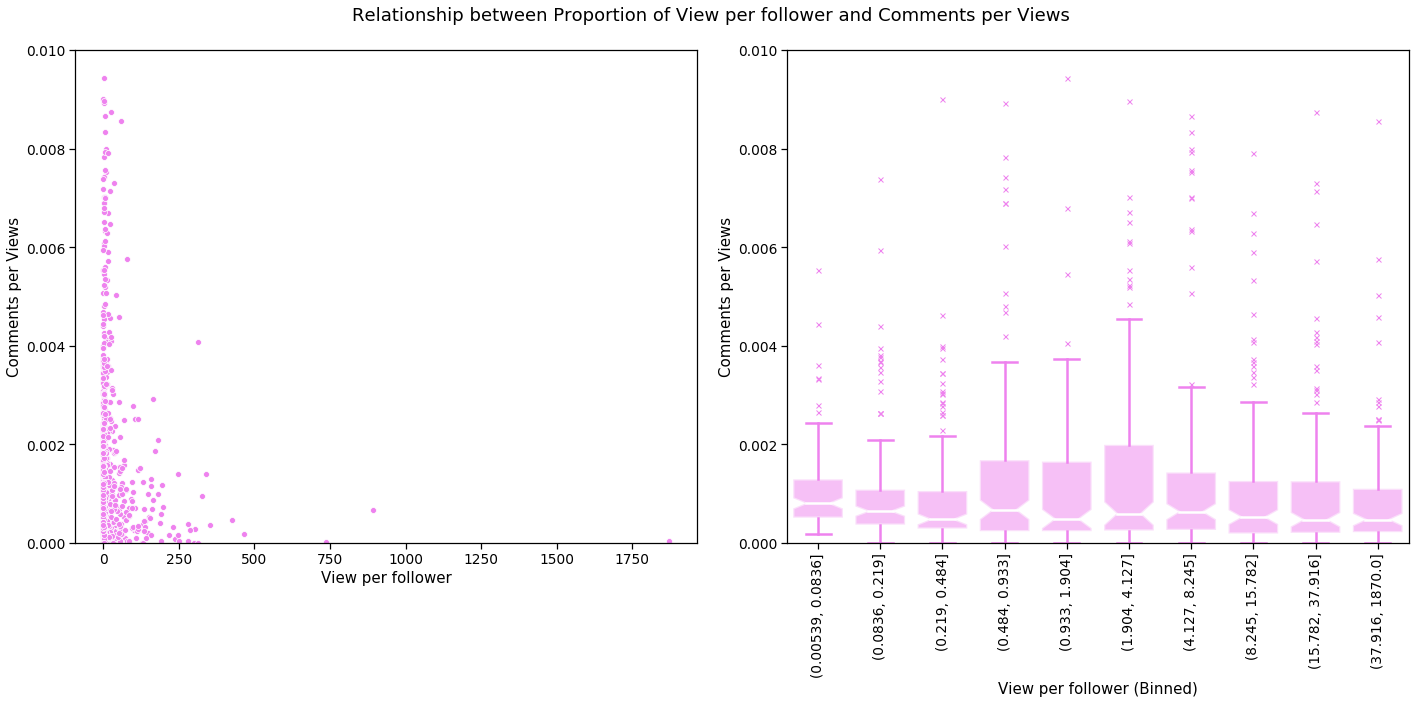

In [164]:
# Scatterplot
plt.figure(figsize=(20, 10), linewidth=1)
plt.subplot(1,2,1)
sns.scatterplot(x=tiktok['view_to_follower_ratio'], y=tiktok['comment_to_view_ratio'], color = 'violet')
plt.xlabel('View per follower')
plt.ylabel('Comments per Views')
plt.ylim(0, 0.01)

# We create boxplot that are separated by equally dense groups
plt.subplot(1,2,2)
sns.boxplot(x=pd.qcut(tiktok['view_to_follower_ratio'], 10), y=tiktok['comment_to_view_ratio'], notch=True, 
            boxprops={'alpha':.5, 'edgecolor':'white', 'facecolor':'violet'},
            whiskerprops={'color':'violet'},
            medianprops={'color':'white'},
            flierprops={'marker':'x', 'markerfacecolor':'white', 'markeredgecolor':'violet'},
            capprops={'color':'violet'}) 

plt.ylim(0, 0.01)
plt.xticks(rotation=90)
plt.xlabel('View per follower (Binned)')
plt.ylabel('Comments per Views')
plt.suptitle('Relationship between Proportion of View per follower and Comments per Views')
plt.tight_layout(rect=[0,0,1,.95]);

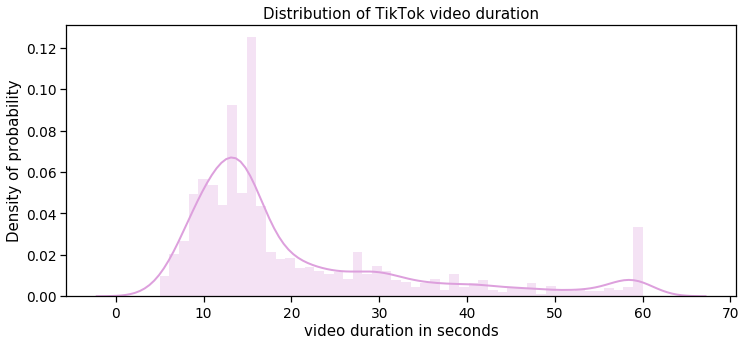

In [165]:
# We look at the distribution of the video durations
av_duration = np.mean(tiktok.video_duration)
plt.figure(figsize=(12,5))
plot = sns.distplot(tiktok['video_duration'], bins=50, 
             kde_kws={'linewidth':2, 'color':'plum'}, 
             hist_kws={'alpha':.3, 'color':'plum'})
plot.set(xlabel='video duration in seconds', ylabel='Density of probability')
plt.title('Distribution of TikTok video duration');
plt.show()

### Comment: 

The figure above shows that the distribution is right-tailed. This shows that despite the allowed duration of a TikTok video being 60 seconds, most creators upload 10-15 seconds videos. 

Compared to platforms like Youtube, Facebook, and Twitter, TikTok is based on short-video sharing. This is because the viewers attention's span is short. And according to Ton (2019), the best way to measure the engagement with users and improve the performance of a video is through what is called the 'completion ratio'. This represents the ratio of the length of the video watched by the user compared to the actual duration of the video. A good completion ratio is >=0.5. Therefore, it would make sense for the creators to make shorter videos as it will be more likely to improve their engagement statistics.

###### Ton, H. H. (2019). 'How to Crack the TikTok Algorithm to Create Viral Videos'. [Online]. Available at: <https://medium.com/@henryhienton/how-to-crack-the-tiktok-algorithm-to-create-viral-videos-d8a00e38e5ae>

### Geographical data

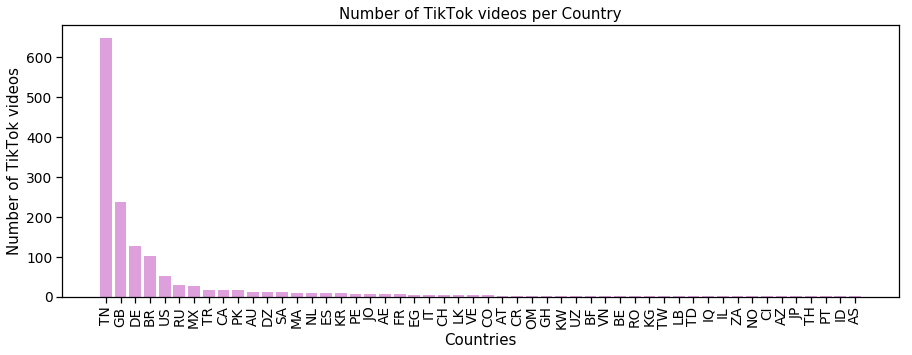

In [166]:
# We Distribution of the videos by countries
plt.figure(num=1, figsize=(15,5))
plt.bar(x=tiktok.country.value_counts().index, 
        height=tiktok.country.value_counts().values, color = 'plum')
plt.xlabel('Countries')
plt.ylabel('Number of TikTok videos')
plt.title('Number of TikTok videos per Country')
plt.xticks(rotation=90);

### Comment:

After looking at the demographical plot of the number of TikTok videos that appear on the trending feed, we can see that the highest number of videos posted come from Tunisia and in second place Great Britain. However, this information is biased as TikTok adapts the videos it shows to the user depending on the country where the user is.

## Hashtags 

In [167]:
#To see the most used hashtags
hashtags = []
hash_patrn = re.compile(r"#[a-zA-Z]+")
hash_match = list(tiktok['text'].apply(hash_patrn.findall)) #Find the matches
hashtag_dict = {}
for match in hash_match:
    for one_match in match:
        if one_match not in hashtag_dict.keys():
            hashtag_dict[one_match] = 1
        else:
            hashtag_dict[one_match] = hashtag_dict[one_match]+1
print(hashtag_dict)

{'#d': 10, '#foryoupage': 201, '#foryou': 228, '#xyzbca': 15, '#desbloqueaelefecto': 2, '#tiktokhacks': 2, '#fyp': 331, '#fireman': 3, '#mariaolguita': 1, '#magic': 6, '#trucos': 3, '#duo': 27, '#excelochallenge': 2, '#wled': 6, '#tunis': 29, '#alquran': 1, '#trend': 34, '#france': 11, '#tunisie': 36, '#tiktokindia': 1, '#couple': 4, '#couplelove': 1, '#challenge': 8, '#prank': 4, '#duet': 21, '#instagram': 10, '#gregorydoyen': 1, '#tunisia': 26, '#patisserie': 1, '#sainthonoretunisie': 2, '#deserts': 1, '#chocolate': 3, '#temperature': 1, '#tempering': 1, '#playing': 1, '#art': 6, '#baby': 3, '#tiktoktunisia': 3, '#horse': 42, '#cleaning': 1, '#therealnumber': 10, '#tiktok': 80, '#tiktokhighlights': 3, '#yzfamily': 91, '#tutorial': 79, '#f': 93, '#viral': 74, '#malouka': 6, '#transition': 42, '#pourtoi': 13, '#makeup': 5, '#halloween': 2, '#hallowen': 1, '#halloweenmakeup': 1, '#followmeeee': 1, '#chacha': 1, '#billieeilish': 20, '#ASMR': 1, '#toenail': 1, '#treatment': 1, '#care': 1,

In [168]:
#Making a list of the most used hashtags and their values
ordered_hash =sorted(hashtag_dict.items(), key=lambda x:x[1])
ordered_hash = ordered_hash[::-1]

#Separating the hashtags and their values into two different lists
ordered_hash_vals = []
ordered_hash_kys = []

#Pick the 20 most used hashtags to plot
for item in ordered_hash[0:20]:
    ordered_hash_kys.append(item[0])
    ordered_hash_vals.append(item[1])
print(ordered_hash)

[('#fyp', 331), ('#foryou', 228), ('#foryoupage', 201), ('#explore', 103), ('#f', 93), ('#yzfamily', 91), ('#horadearrasar', 85), ('#tiktok', 80), ('#tutorial', 79), ('#viral', 74), ('#slowmo', 46), ('#animeedit', 46), ('#transition', 42), ('#horse', 42), ('#anime', 37), ('#tunisie', 36), ('#trend', 34), ('#follow', 31), ('#trending', 30), ('#like', 30), ('#tunis', 29), ('#learnontiktok', 27), ('#funny', 27), ('#duo', 27), ('#tunisia', 26), ('#duet', 21), ('#parati', 20), ('#billieeilish', 20), ('#fy', 19), ('#sport', 18), ('#recommendations', 17), ('#linhacongelante', 17), ('#vs', 17), ('#collage', 15), ('#comedy', 15), ('#xyzbca', 15), ('#cool', 13), ('#otaku', 13), ('#pourtoi', 13), ('#maroc', 12), ('#yullbeyz', 12), ('#infinixchallenge', 11), ('#cr', 11), ('#foryourpage', 11), ('#france', 11), ('#k', 10), ('#workout', 10), ('#musculation', 10), ('#equestrian', 10), ('#twins', 10), ('#tunisienne', 10), ('#therealnumber', 10), ('#instagram', 10), ('#d', 10), ('#love', 9), ('#meknes',

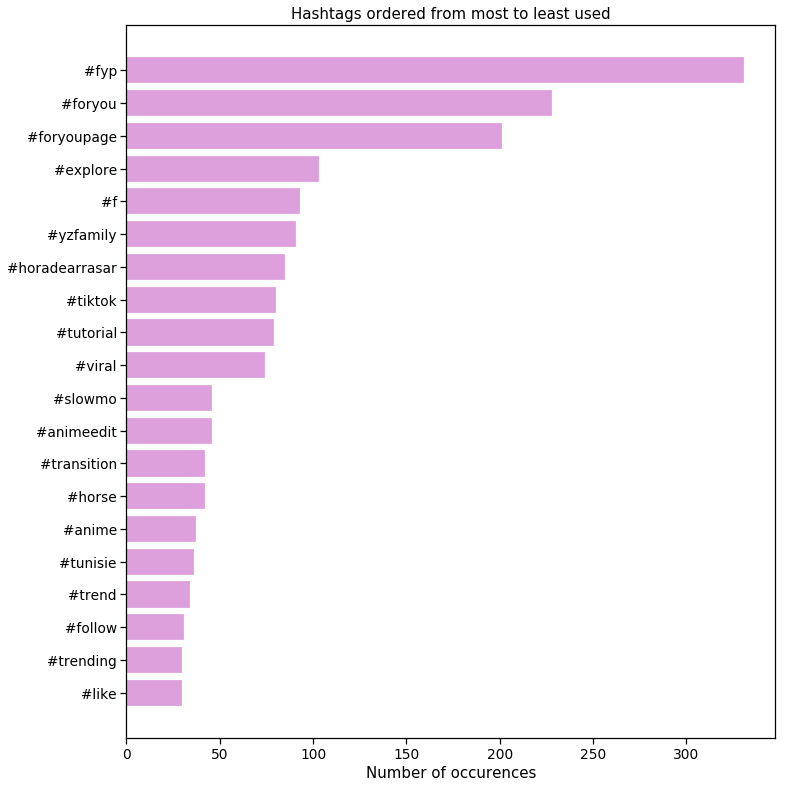

In [169]:
# After ordering the hashtags from the most popular to the least popular, we plot it 
fig, ax = plt.subplots(figsize = (12,12))
position_y = np.arange(len(ordered_hash_kys))
ax.barh(position_y ,list(ordered_hash_vals)[::-1], align='center', color = 'plum', edgecolor = 'white', linewidth=0.2)
ax.set_yticks(position_y)
ax.set_yticklabels(list(ordered_hash_kys)[::-1])
ax.set_xlabel("Number of occurences")
ax.set_title("Hashtags ordered from most to least used", fontsize = 15)
plt.tight_layout(pad=3)
plt.show()

###### Zornoza, j. (2019). 'Visualisation of Information from Raw Twitter Data — Part 1'.[online]. Available at: <https://towardsdatascience.com/visualization-of-information-from-raw-twitter-data-part-1-99181ad19c> 

## Find Outliers 

Before creating a multiple linear regression to look at the relationship between a dependent and independent variables, we have to look at the outliers.

As mentioned before in this study, we have extreme outliers in the dataset. And in this section, we will use the Mahalanobis Distance to find them.

In [170]:
# We identify the outliers
o_col = ['video_duration', 'likesCount', 'playCount', 'commentCount',
              'follower_count', 'following_count', 'video_count', 'total_favorited', 'like_to_view_ratio', 
              'comment_to_view_ratio', 'view_to_follower_ratio']

# We calculate the mean of the o_col columns and we put them into an array
o_col_means = [tiktok[values].mean() for values in o_col]

# Then we reshape it to have the size we need
mean_vect = np.asarray(o_col_means).reshape(1,11)
mahalanobisDistances = cdist(tiktok[o_col], mean_vect, metric = 'mahalanobis').flatten()
print(mahalanobisDistances)

[4.34566811 1.42779114 0.90724291 ... 4.68020579 3.14566931 4.53781786]


###### City, University of London (2020). 'Lab Feedback 3'. In3061 Principles of Data Science 

### Visualisation 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


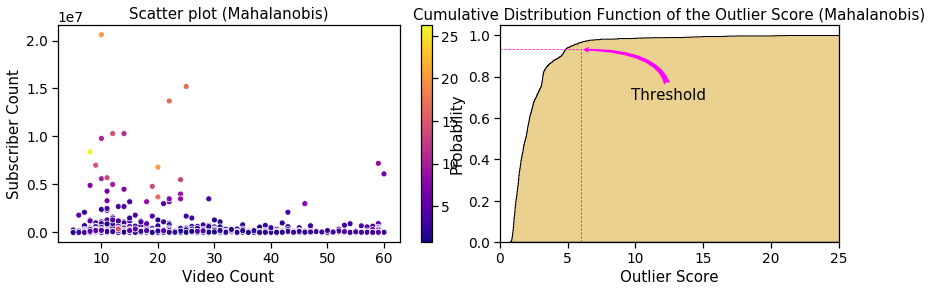

In [171]:
# We are going to plot a scatter plot in order to visualise the points
plt.figure(num=6, figsize=(14, 4), linewidth=1)

p = plt.scatter(tiktok.video_duration,tiktok.likesCount, c = mahalanobisDistances, cmap = 'plasma')

plt.subplot2grid((1,9), (0,0), colspan=5)
sns.scatterplot(x=tiktok.video_duration,
                y=tiktok.likesCount, 
                hue=mahalanobisDistances,
                palette='plasma', 
                legend=False)
plt.colorbar(p)
plt.xlabel('Video Count')
plt.ylabel('Subscriber Count')
plt.title('Scatter plot (Mahalanobis)')

plt.subplot2grid((1,9), (0,5), colspan=4)
plt.hist(mahalanobisDistances, cumulative=True, histtype='stepfilled', normed=True, bins=1000, ec='black', fc=(218/256, 165/256, 32/256, 0.5))
plt.plot([6, 6, 0], [0, .935, .935], 'k-', lw=1, color='magenta', dashes=[2, 2])
plt.annotate('Threshold', xy=(6, 0.93),
            xytext=(50, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="magenta", ec="none",
                            connectionstyle="angle3,angleA=90,angleB=0"))
plt.xlim(0, 25)
plt.xlabel('Outlier Score')
plt.ylabel('Probability')
plt.title('Cumulative Distribution Function of the Outlier Score (Mahalanobis)');

###### Tafasca, S. (n.d.). 'On Online Media Consumption : A Youtube Case Study'

### Correlation Analysis

We plot a Pearson Correlation matrix in order to look for multicollinearity before running a regression. Having two or more highly linearly related variables can undermine the statistical significance of our target variable.

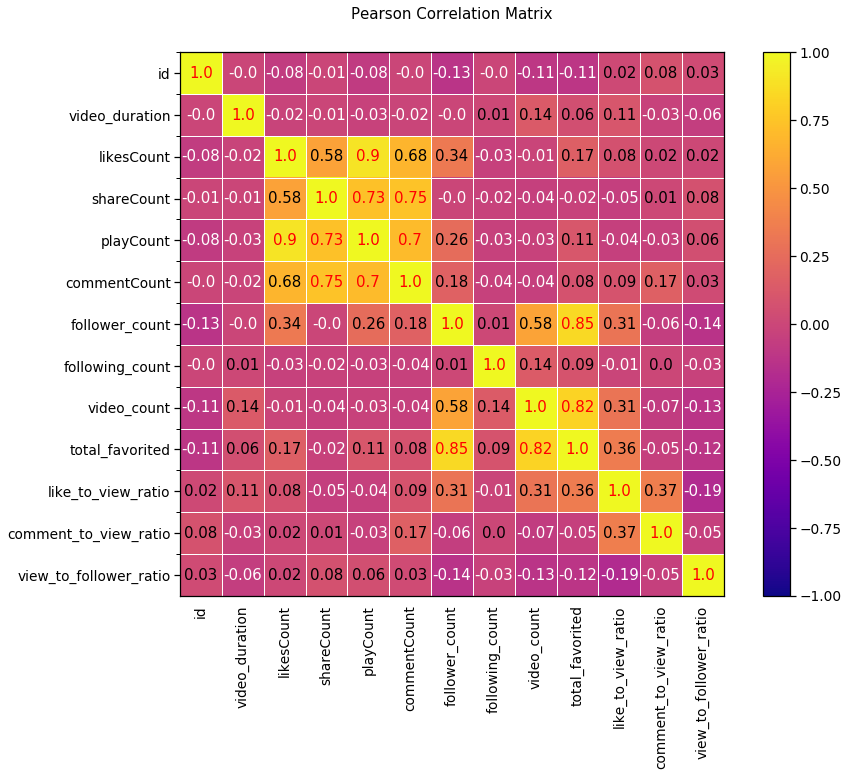

In [172]:
# Correlation Matrix (Pearson)
numerical_columns = tiktok.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = tiktok[numerical_columns].corr(method='pearson') 

plt.figure(num=9, figsize=(14,10))
plt.matshow(correlation_matrix, fignum=False, vmin=-1, vmax=1, cmap='plasma')

# We add the values (as text) inside the matrix and for each numerical variable
for a in range(len(numerical_columns)):
    for b in range(len(numerical_columns)):
        if correlation_matrix.iloc[a, b] < 0:
            plt.text(a, b, round(correlation_matrix.iloc[a, b], 2), ha="center", va="center", color="w")
        elif correlation_matrix.iloc[a, b] > 0.7:
            plt.text(a, b, round(correlation_matrix.iloc[a, b], 2), ha="center", va="center", color="red")
        else:
            plt.text(a, b, round(correlation_matrix.iloc[a, b], 2), ha="center", va="center", color="black")           

plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=90)
plt.yticks(range(len(numerical_columns)), numerical_columns)
plt.tick_params(axis='x', labelbottom=True, labeltop=False, top=False, bottom=False)

ax = plt.gca()
ax.set_xticks(np.arange(len(numerical_columns))-.5, minor=True)
ax.set_yticks(np.arange(len(numerical_columns))-.5, minor=True)

plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)

plt.grid(which='minor', color='w', linestyle='-', linewidth=1)
plt.grid(False)
plt.title('Pearson Correlation Matrix')
plt.colorbar();

In [173]:
# We find the top 10 correlated numerical values
num_feat = tiktok.select_dtypes(include=[np.number])
corr = num_feat.corr()
print(corr['playCount'].sort_values(ascending=False)[:10], '\n')

playCount                 1.000000
likesCount                0.902917
shareCount                0.734682
commentCount              0.703421
follower_count            0.255808
total_favorited           0.110787
view_to_follower_ratio    0.056754
video_duration           -0.025141
video_count              -0.028110
following_count          -0.034266
Name: playCount, dtype: float64 



The number of likes, shares, and comments have the highest correlations to the target variable (number of views). Therefore, we will avoid using them in our regression analysis.

###### City, University of London (2020) Lab feedback 05 - In3061 Principles of Data Science

# Multiple Linear Regression

In [174]:
# We define our target and regressors
target = tiktok["playCount"];
regressors = tiktok[["view_to_follower_ratio", "like_to_view_ratio", "video_count", "following_count", "comment_to_view_ratio", "video_duration"]]

# like to share and like to comment
# We have to manually add the intercepts
const_reg = sm.add_constant(regressors)

# we use the OLS function from statsmodels
mdl = sm.OLS(target,const_reg)
rslts = mdl.fit()

print (rslts.summary())

                            OLS Regression Results                            
Dep. Variable:              playCount   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.492
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.177
Time:                        00:08:11   Log-Likelihood:                -25139.
No. Observations:                1419   AIC:                         5.029e+04
Df Residuals:                    1412   BIC:                         5.033e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.07

const                     4.076268e+06
view_to_follower_ratio    8.161706e+03
like_to_view_ratio       -3.092123e+06
video_count              -8.253819e+01
following_count          -2.131569e+02
comment_to_view_ratio    -1.233332e+08
video_duration           -1.743402e+04
dtype: float64


(array([1.000e+00, 1.235e+03, 1.190e+02, 3.000e+01, 1.400e+01, 2.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([-1.89654208e+07, -8.76702222e+06,  1.43137636e+06,  1.16297749e+07,
         2.18281735e+07,  3.20265721e+07,  4.22249707e+07,  5.24233693e+07,
         6.26217678e+07,  7.28201664e+07,  8.30185650e+07,  9.32169636e+07,
         1.03415362e+08,  1.13613761e+08,  1.23812159e+08,  1.34010558e+08,
         1.44208956e+08,  1.54407355e+08,  1.64605754e+08,  1.74804152e+08,
         1.85002551e+08]),
 <a list of 20 Patch objects>)

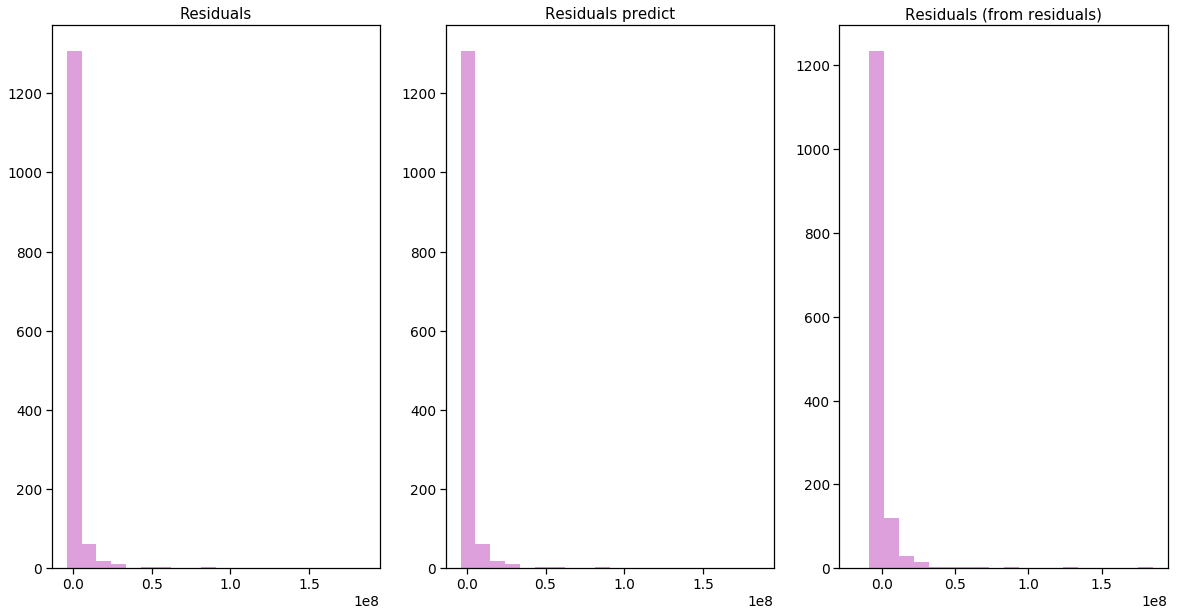

In [175]:
print(rslts.params)

#Calculating dependent variable values from parameters directly
mdlled_dependent  = tiktok['like_to_view_ratio']*rslts.params['like_to_view_ratio']  + tiktok['video_count']* rslts.params['video_count'] + tiktok['following_count']*rslts.params['following_count'] +  rslts.params['const']

#Calculating dependent variable values from the predict method
mdlled_dependent_predict = rslts.predict()

#Calculate the residuals 3 ways
rslt=target-mdlled_dependent
rslt_predict=target-mdlled_dependent
rslt_lib = rslts.resid

#both residual distributions are the same (because both methods of
#calculating the dependent variable values are the same)
f, ax = plt.subplots(1,3, figsize = (20,10))
ax[0].set_title("Residuals")
ax[0].hist(rslt,20, color = 'plum')
ax[1].set_title("Residuals predict")
ax[1].hist(rslt_predict,20, color = 'plum')
ax[2].set_title("Residuals (from residuals)")
ax[2].hist(rslt_lib,20, color = 'plum')

###### City, University of London (2020) Lab feedback 05 - In3061 Principles of Data Science

## Non-Linear Regression

In [176]:
# First we Define Formula
formula = 'np.log(playCount) ~ np.log(view_to_follower_ratio)'

    ## Fit the model
mdlNonReg = sm.formula.ols(formula=formula, data=tiktok) 
non_linear_result = mdlNonReg.fit()

print(non_linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(playCount)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.260
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.133
Time:                        00:08:12   Log-Likelihood:                -2980.4
No. Observations:                1419   AIC:                             5965.
Df Residuals:                    1417   BIC:                             5975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Topic Modelling

## Latent Dirichlet allocation (LDA)

LDA is used to look for hidden semantic structures in documents. These are based on the likelihood of word co-occurence. 
We use this method to allocate the text caption of our videos into different topics:

In [177]:
# First, we need to remove the punctuation in our text using regular expressions 
tiktok['text_processed'] = tiktok['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Then we convert all the text to lowercase
tiktok['text_processed'] = tiktok['text_processed'].map(lambda x: x.lower())

# And we print out the first couple of rows 
tiktok['text_processed'].head()

0    #dúo con @reallife556 #foryoupage #foryou #xyz...
1    #duo #excelochallenge2 #fyp #wled_bandoura  wa...
2               #реклама #tunis #لفليحشيش #حشيش #тунис
3                                   #alquran_alkareem0
4               استعنا عالشقاء بالله والحمد الله ❤❤❤❤❤
Name: text_processed, dtype: object

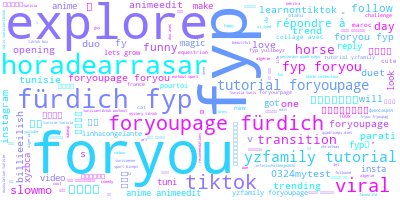

In [178]:
# Join the different processed titles together.
string = ','.join(list(tiktok['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=4000, colormap=matplotlib.cm.cool, contour_width=4, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(string)

# Visualize the word cloud
wordcloud.to_image()

###### City, University of London (2020) Lab 08 - Text - Feedback. IN3061 Principles of Data Science

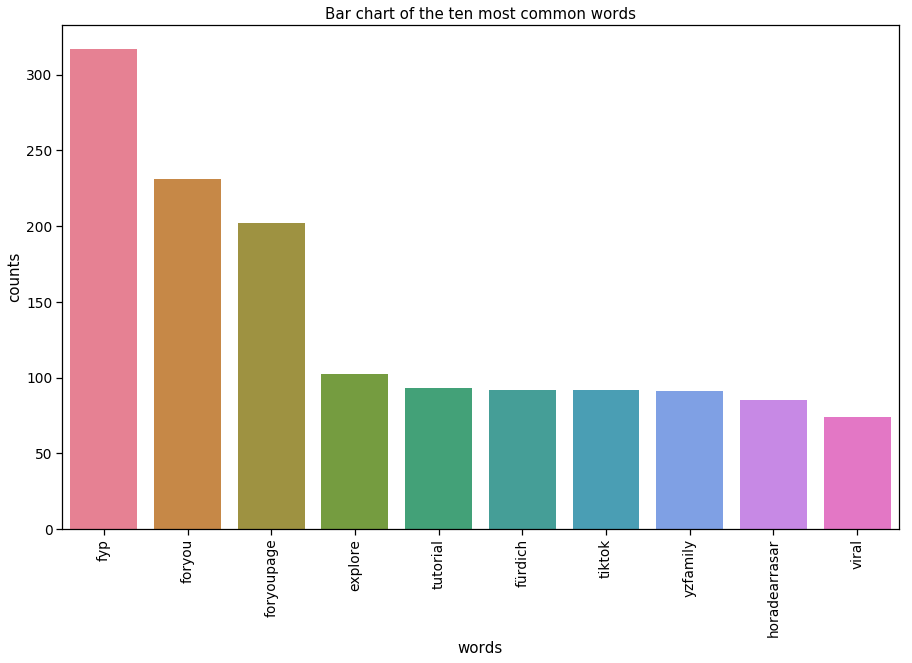

In [179]:
# Helper function
def ten_most_common(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    
    for current_count in count_data:
        total_counts+=current_count.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [c[0] for c in count_dict]
    counts = [c[1] for c in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Bar chart of the ten most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tiktok['text_processed'])

# Visualise the 10 most common words
ten_most_common(count_data, count_vectorizer)

In [180]:
# We define a function to print the topics for LDA
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for index, topic in enumerate(model.components_):
        print("\nTopic #%d:" % index)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# We set the two parameters below (which can be changed)
number_topics = 5
number_words = 10

# We build the LDA model and then fit it
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# and lastly, we use the function defined earlier to print the topics found using the LDA model
print("Topics found using Latent Dirichlet allocation:")
print_topics(lda, count_vectorizer, number_words)

Topics found using Latent Dirichlet allocation:

Topic #0:
fyp explore foryou slowmo tunisia follow tiktok like في tunisie

Topic #1:
horadearrasar fyp duo foryou ههه animeedit في viral bts reply

Topic #2:
day tiktok opening 0324mytest الله répondre box على fyp cr7

Topic #3:
fyp foryoupage foryou fürdich yzfamily tutorial viral tiktok explore anime

Topic #4:
make foryou fyp learnontiktok تونس instagram foryoupage transition avec ليبيا


###### Kapadia, S. (2019). 'Topic Modeling in Python: Latent Dirichlet Allocation (LDA)'. [online]. Available at: <https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0> [Accessed on 20 December 2020]

## Non-Negative Matrix Factorization (NMF)

In [181]:
# Max Number of Words in Vocabulary
maxWords = 5000

# We create a TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=maxWords)

# We then tokenize and build the vocabulary and get the feature names
tfidf_vect.fit_transform(tiktok.text)
tfid_feature_names = tfidf_vect.get_feature_names()

# Then we Encode corpus
tfidf_doc_term = tfidf_vect.transform(tiktok.text).toarray()
tfidf_doc_term = MinMaxScaler().fit_transform(tfidf_doc_term)

nmf = NMF(n_components=number_topics, beta_loss='kullback-leibler', solver='mu', max_iter=400, 
          alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf_doc_term)

# Print the topics found by the NMF model
print("Topics found via NMF:")
print_topics(nmf, tfidf_vect, number_words)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:228: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  UserWarning)


Topics found via NMF:

Topic #0:
foryoupage fürdich yzfamily tutorial fyp foryou transition trending got yullbeyz

Topic #1:
instagram tunis tunisie tunisia تونس sport workout musculation tunisiantiktok biceps

Topic #2:
répondre في تونس explore follow like لايك 0324mytest فولو اكسبلور

Topic #3:
horadearrasar horse day animeedit opening parati anime otaku fy collection

Topic #4:
avec slowmo grow pourtoi collage learnontiktok kénitra explore lets كان


In [182]:
print('\n      Latent Dirichlet Allocation (LDA) :')
print('      -----------------------------------')
print_topics(lda, count_vectorizer, number_words)
print('      ----------------------------------------------')
print('      Non-Negative Matrix Factorization (NMF) :')
print('      -----------------------------------------')
print_topics(nmf, tfidf_vect, number_words)


      Latent Dirichlet Allocation (LDA) :
      -----------------------------------

Topic #0:
fyp explore foryou slowmo tunisia follow tiktok like في tunisie

Topic #1:
horadearrasar fyp duo foryou ههه animeedit في viral bts reply

Topic #2:
day tiktok opening 0324mytest الله répondre box على fyp cr7

Topic #3:
fyp foryoupage foryou fürdich yzfamily tutorial viral tiktok explore anime

Topic #4:
make foryou fyp learnontiktok تونس instagram foryoupage transition avec ليبيا
      ----------------------------------------------
      Non-Negative Matrix Factorization (NMF) :
      -----------------------------------------

Topic #0:
foryoupage fürdich yzfamily tutorial fyp foryou transition trending got yullbeyz

Topic #1:
instagram tunis tunisie tunisia تونس sport workout musculation tunisiantiktok biceps

Topic #2:
répondre في تونس explore follow like لايك 0324mytest فولو اكسبلور

Topic #3:
horadearrasar horse day animeedit opening parati anime otaku fy collection

Topic #4:
avec slowm

###### Scikit-learn (2020). 'Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation'. [online]. Available at: <https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py> [Accessed on 17 December 2020]

## Topic Modelling Visualisation

In [183]:
# Non-Negative Matrix Factorization
nfm_mat_score = nmf.transform(tfidf_doc_term)
nmf_df_score = pd.DataFrame(nfm_mat_score, columns = ['topic{}'.format(i) for i in range(1, number_topics+1)])
nmf_labels = nmf_df_score.apply(lambda row: row.argmax(), axis=1)

# Latent Dirichlet Allocation
lda_mat_score = lda.transform(count_data)
lda_df_score = pd.DataFrame(lda_mat_score, columns = ['topic{}'.format(i) for i in range(1, number_topics+1)])
lda_labels = lda_df_score.apply(lambda row: row.argmax(), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:228: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  UserWarning)


In [184]:
# t-SNE Projection
tsne_trans_data = TSNE(n_components=2, perplexity=80, metric='cosine', learning_rate=100).fit_transform(tfidf_doc_term)

#### Visualisation

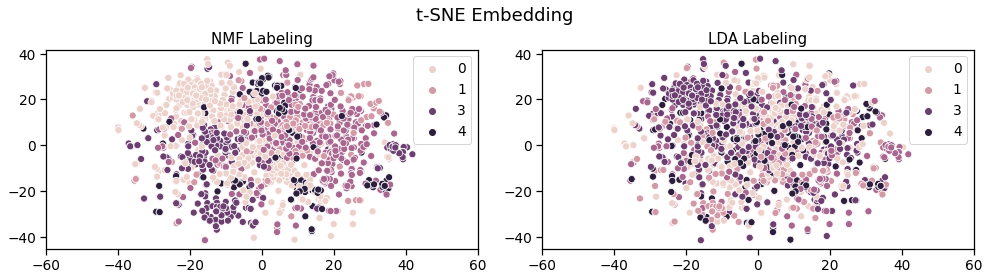

In [185]:
plt.figure(figsize=(14, 4), linewidth=1)

plt.subplot(1,2,1)
sns.scatterplot(x=tsne_trans_data[:, 0], y=tsne_trans_data[:, 1], hue=nmf_labels, hue_order=nmf_df_score.columns.values, s=50)
plt.xlim(-60,60)
plt.title('NMF Labeling')

plt.subplot(1,2,2)
sns.scatterplot(x=tsne_trans_data[:, 0], y=tsne_trans_data[:, 1], hue=lda_labels, hue_order=lda_df_score.columns.values,s=50)
plt.xlim(-60,60)
plt.title('LDA Labeling')

plt.suptitle('t-SNE Embedding')
plt.tight_layout(rect=[0, 0, 1, 0.95]);

###### Tafasca, S. (n.d.). 'On Online Media Consumption : A Youtube Case Study'

### Comment:

After applying both models to our data we can see that thee NMF Labelling performed between than LDA's. Both clusters show that the topics still overlap each other and are not clearly and perfectly seperated. But we can see that NMF's scatter plot is better delimited than LDA's.

There were no labels in our dataset and therefore, coming modelling those labels was very interesting. However, it may be that TikTok does not use the captions or uses them combined with hashtags and other features to classify their videos.

## Validation results

In [186]:
# We start by preparing the stopwords
stop_words = stopwords.words('english')

# Then we tokenize the words and clean the text
def preprocess(sentences):
  for s in sentences:
    yield(gensim.utils.simple_preprocess(str(s), deacc=True))            
words_data = list(preprocess(tiktok['text_processed']))

# We then define the function for stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for t in texts:
        doc = nlp(" ".join(t)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

bigram = gensim.models.Phrases(words_data, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Next we remove the stop words and form Bigrams
no_stop_words = remove_stopwords(words_data)
data_words_bigrams = make_bigrams(no_stop_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized) 

# Create Corpus 
corpus = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(corpus) for corpus in corpus]  

lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus)) 
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_score = coherence_lda.get_coherence()
print('\nCoherence Score: ', coherence_score)


Perplexity:  -7.487981888160774

Coherence Score:  0.6705972789346017


###### CR (2020). 'Topic Modeling using Gensim-LDA in Python'. [Online]. Available at: <https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920> [Accessed on 20 December 2020]

In [187]:
# We define the Search Param for GridSearch
search_params = {'n_components': [2, 3, 4, 5, 10, 15, 20, 25], 'learning_decay': [.5, .7, .9]}

# We initialisee the model
lda = LatentDirichletAllocation()

# Init Grid Search class
model = GridSearchCV(lda, search_params)

model.fit(count_data)
best_lda_model = model.best_estimator_

print("Best model's params: ", model.best_params_)
print("Best log likelihood score: ", model.best_score_)
print("Model perplexity: ", best_lda_model.perplexity(count_data))

Best model's params:  {'learning_decay': 0.7, 'n_components': 2}
Best log likelihood score:  -20676.264149269635
Model perplexity:  2943.8354406616018


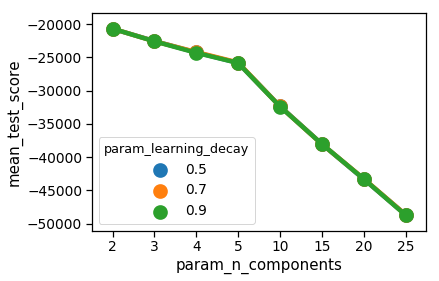

In [188]:
df_cv_results = pd.DataFrame(model.cv_results_)
df_cv_results.to_csv("LDAGridSearchResults.csv", header=True, index=False, encoding='utf-8')
sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=df_cv_results)